In [2]:
#Importing Essential Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models, Input
import os
import cv2

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
# Data paths

In [6]:
train_data_path = 'Facial_Images/train' 
val_data_path = 'Facial_Images/validation'

In [7]:
# Count training images

In [8]:
x = 0
for expression in os.listdir(train_data_path):
    expression_path = os.path.join(train_data_path, expression)
    print(expression, "  ", len(os.listdir(expression_path)))
    x += len(os.listdir(expression_path))
print("Total Images", x)

angry    3993
disgust    436
fear    4103
happy    7164
neutral    4982
sad    4938
surprise    3205
Total Images 28821


In [9]:
# Count validation images

In [10]:
emotions = []
x = 0
for expression in os.listdir(val_data_path):
    expression_path = os.path.join(val_data_path, expression)
    print(expression, "  ", len(os.listdir(expression_path)))
    emotions.append([expression])
    x += len(os.listdir(expression_path))
print("Total Images", x)

angry    960
disgust    111
fear    1018
happy    1825
neutral    1216
sad    1139
surprise    797
Total Images 7066


In [11]:
print(emotions)

[['angry'], ['disgust'], ['fear'], ['happy'], ['neutral'], ['sad'], ['surprise']]


In [12]:
# Display example images

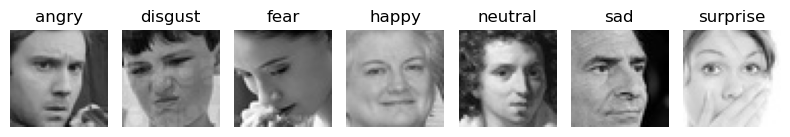

In [13]:
i = 1
plt.figure(figsize=(8, 8))
for expression in os.listdir(train_data_path):
    image_path = os.path.join(train_data_path, expression, os.listdir(os.path.join(train_data_path, expression))[0])
    image = load_img(image_path)
    plt.subplot(1, 7, i)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()

In [14]:
#Data Augmentation + Normalization

In [15]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_data_gen = ImageDataGenerator(rescale=1./255)

In [16]:
# Datasets

In [17]:
train_dataset = train_data_gen.flow_from_directory(
    train_data_path,
    shuffle=True,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)

val_dataset = val_data_gen.flow_from_directory(
    val_data_path,
    shuffle=False,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [18]:
# CNN Model

In [19]:
model = models.Sequential()

model.add(Input(shape=(48, 48, 1)))  # Explicit input layer

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,311,047 (8.82 MB)

 Trainable params: 2,308,359 (8.81 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [20]:
# Compile

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
#Callbacks for training management and resumption

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

checkpoint_path = "models/ckpt_epoch_{epoch:02d}_valacc_{val_accuracy:.2f}.keras"

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=False)
]

In [24]:
#Training (with resume support)

In [ ]:
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,  
    verbose=1,
    callbacks=callbacks
)

Epoch 1/50
210/226 ━━━━━━━━━━━━━━━━━━━━ 1:27 5s/step - accuracy: 0.2089 - loss: 2.0113

In [ ]:
# Save final model

In [ ]:
os.makedirs('models', exist_ok=True)
model.save('models/Face_Emotion_classification.keras')

In [ ]:
#Evaluation: Confusion Matrix + Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

val_preds = model.predict(val_dataset)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_dataset.classes
class_names = list(val_dataset.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
#Grad-CAM Visualization (on one example)

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, tf.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(conv_outputs * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Use a sample image

In [ ]:
sample_img_path = os.path.join(val_data_path, 'happy', os.listdir(os.path.join(val_data_path, 'happy'))[0])
img = load_img(sample_img_path, color_mode='grayscale', target_size=(48, 48))
img_array = np.expand_dims(np.array(img) / 255.0, axis=(0, -1))  # Shape: (1, 48, 48, 1)
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name='conv2d_3')

plt.imshow(img_array.squeeze(), cmap='gray')
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title("Grad-CAM on 'Happy'")
plt.axis('off')
plt.show()

In [ ]:
#Make a Prediction (Single Image Inference)

In [ ]:
model = tf.keras.models.load_model('models/Face_Emotion_classification.keras')

image = cv2.imread('Google_Images/sample 1.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (48, 48))
image = cv2.bitwise_not(image)
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=(0, -1))

output = model.predict(image)
predicted_class = np.argmax(output)

emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print(f"Predicted Emotion: {emotion_labels[predicted_class]}")